In this tutorial, we will use the LinearRegression classifier from scikit-learn to predict digit labels based on images.  

# Digit dataset built into sklearn

In [1]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn import metrics
digits = load_digits()

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


To visualize the data:

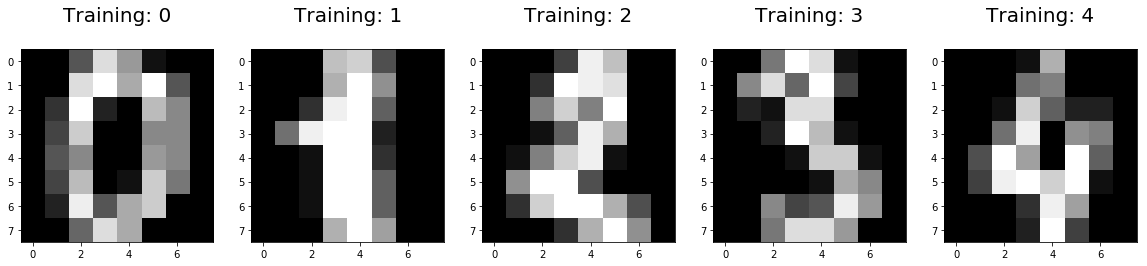

In [3]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

Now we split the training and testing data using the built in function

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

To build the 4-step learning model:
1. import the desired model as a python class
2. create an instance of the model
3. train the model while storing the info learned from the data: the model learns the relationship between x and y (digits and labels) 
4. Predict labels of new unseen data

In [5]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(multi_class = "auto") # default solver is incredibly slow thats why we change it #step2
logisticRegr.fit(x_train, y_train) #step 3

#step 4 below
# predict returns a NumPy Array

# Predict for One Observation (image)
#logisticRegr.predict(test_img[0].reshape(1,-1))
# Predict for Multiple Observations (images) at Once
#logisticRegr.predict(test_img[0:10])
# Make predictions on entire test data
predictions = logisticRegr.predict(x_test)

c:\users\abhi\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


To measure the performance of our model, we will use accuracy as a metric

Accuracy = (fraction of correct predictions): correct predictions / total number of data points

In [6]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print("Thus our accuracy is ", score*100)

Thus our accuracy is  95.33333333333334


#### Confusion Matrix
A confusion matrix is a table used to describe performance of a classification model.

To make on in matplotlib:

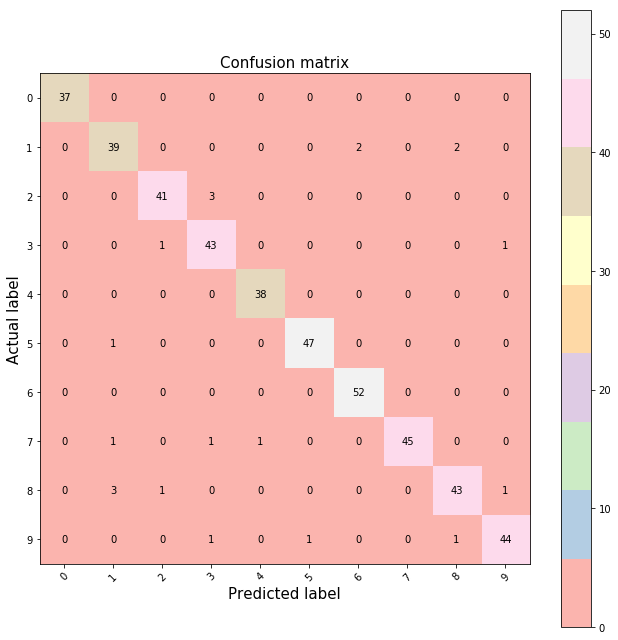

In [7]:
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape

for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

# MNIST Digit dataset

In [10]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
# These are the images
# There are 70,000 images (28 by 28 images for a dimensionality of 784)
print(mnist.data.shape)

# These are the labels
print(mnist.target.shape)

c:\users\abhi\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
c:\users\abhi\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


TimeoutError: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond

Source: https://www.codementor.io/mgalarny/making-your-first-machine-learning-classifier-in-scikit-learn-python-db7d7iqdh